In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# settings for plots and diagrams
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='serif')
plt.rc('mathtext', **{'default':'regular'})
plt.style.use(['seaborn-white', 'seaborn-paper'])

In [5]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [6]:
def stylize_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.xaxis.set_tick_params(top=False, direction='out', width=1)
    ax.yaxis.set_tick_params(right=False, direction='out', width=1)
    
def save_image(fig, title):
    if title is not None:
        fig.savefig('results/'+title+".png", dpi=300, bbox_inches='tight', transparent=True)
        fig.savefig('results/'+title+".pdf", bbox_inches='tight')

In [7]:
# Load the dataset
n_window_len = 128
file = open('results/mhealth_window_size_' + str(n_window_len) + '.pickle', 'rb')
mhealth_df, mhealth_activities = pickle.load(file)
file.close()

In [9]:
mhealth_df.head()

,ACC-X-0,ACC-X-1,ACC-X-2,ACC-X-3,ACC-X-4,ACC-X-5,ACC-X-6,ACC-X-7,ACC-X-8,ACC-X-9,...,ACC-Z-119,ACC-Z-120,ACC-Z-121,ACC-Z-122,ACC-Z-123,ACC-Z-124,ACC-Z-125,ACC-Z-126,ACC-Z-127,Class
0,-9.7788,-9.7733,-9.8609,-9.7409,-9.7821,-9.6911,-9.7595,-9.6936,-9.7817,-9.6884,...,0.90225,0.92891,1.07390,0.98331,0.77485,1.04310,1.02110,0.93261,0.83461,0
1,-9.8015,-9.8540,-10.0390,-9.6260,-9.6113,-9.6385,-9.5082,-9.8219,-9.5878,-9.4797,...,0.95829,0.67873,0.95914,0.95171,0.70751,0.77799,0.55782,0.68244,0.95222,0
2,-9.7932,-9.4688,-9.4488,-9.7494,-9.8320,-10.1170,-9.9024,-9.5609,-9.7589,-9.7587,...,0.85264,0.87080,0.94547,0.90256,0.72753,0.69845,0.58617,0.70809,0.68505,0
3,-9.8353,-9.8729,-9.7402,-9.6347,-9.6642,-9.8995,-9.7391,-9.6628,-9.8496,-9.3982,...,0.72773,0.71355,0.90981,0.55312,0.67046,0.90150,0.84481,0.83081,0.75969,0
4,-9.7910,-9.5912,-9.7553,-9.8718,-9.7280,-9.8535,-9.7433,-9.5773,-9.7494,-9.6773,...,0.79856,0.84378,0.91948,0.75900,0.97185,0.74060,0.91408,0.93227,0.88363,0


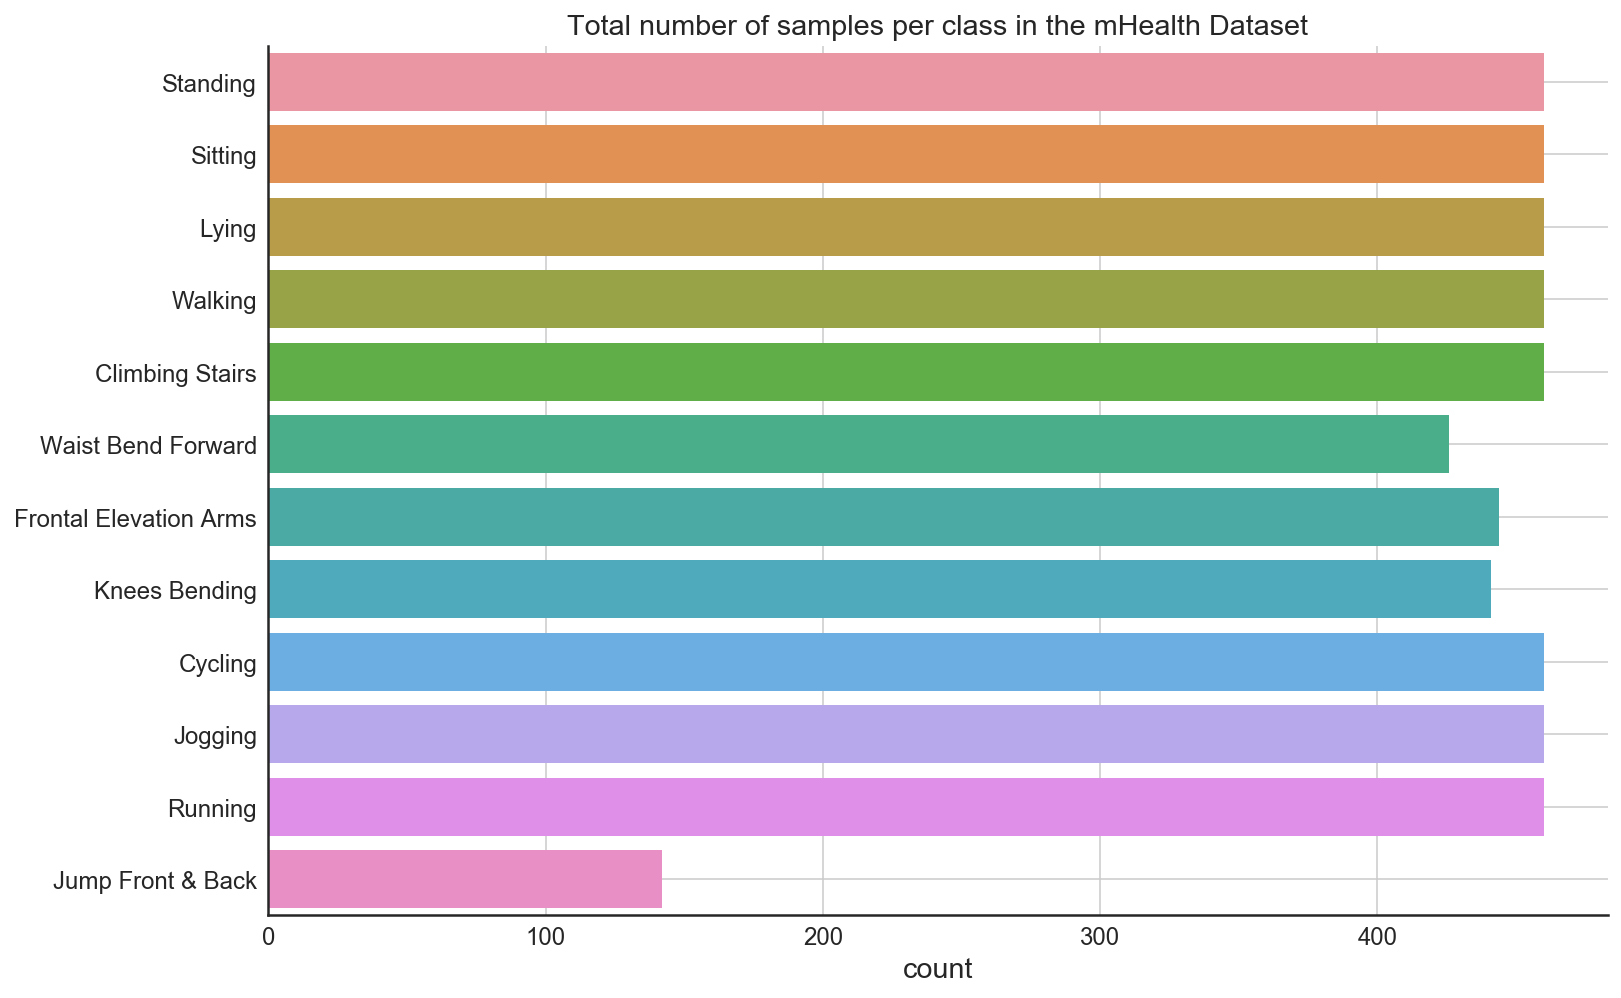

In [8]:
fig = plt.figure(figsize = (12, 8))
ax = sns.countplot(data = mhealth_df, y = 'Class')
ax.set_yticklabels(mhealth_activities)
ax.set_xticklabels(ax.get_xticks().astype(int))
ax.set_ylabel("")
ax.grid()
stylize_axes(ax)
ax.set_title("Total number of samples per class in the mHealth Dataset")
save_image(fig, "Total number of samples per class in the mHealth Dataset")

In [13]:
# As we can see the Jump Front and Back class have very few samples compared to other classes so we will remove it alltogether
mhealth_df = mhealth_df[mhealth_df['Class'] != 11]

In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [16]:
import utilities as util

## Normalization 

In [17]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer

In [18]:
def compare_preprocessing(data, prepro):
    
    print(data.shape)
    if prepro == 'MinMaxScaler':
        processor = MinMaxScaler((-1.0, 1.0))
    elif prepro == 'RobustScaler':
        processor = RobustScaler()
    elif prepro == 'StandardScaler':
        processor = StandardScaler()
    elif prepro == 'Normalizer':
        processor = Normalizer()
        
    data_ = processor.fit_transform(data)
    data_ = data_.reshape(-1, n_window_len, 3)
    data = data.reshape(-1, n_window_len, 3)
    
    fig, axes = plt.subplots(nrows = 2 , ncols = 3, figsize = (20, 5), sharex = True, constrained_layout = True)
    tp = np.random.randint(0, data.shape[0])
    tp = 39
    print(tp)
    
    axes[0, 0].plot(data[tp, :, 0], label = 'X')
    axes[1, 0].plot(data_[tp, :, 0], label = 'X_', c='r')
    axes[0, 0].legend()
    axes[1, 0].legend()
    stylize_axes(axes[0, 0])
    stylize_axes(axes[1, 0])
    
    axes[0, 1].plot(data[tp, :, 1], label = 'Y')
    axes[1, 1].plot(data_[tp, :, 1], label = 'Y_', c='r')
    axes[0, 1].legend()
    axes[1, 1].legend()
    stylize_axes(axes[0, 1])
    stylize_axes(axes[1, 1])
    
    axes[0, 2].plot(data[tp, :, 2], label = 'Z')
    axes[1, 2].plot(data_[tp, :, 2], label = 'Z_', c='r')
    axes[0, 2].legend()
    axes[1, 2].legend()
    stylize_axes(axes[0, 2])
    stylize_axes(axes[1, 2])
    
    fig.suptitle("Unaltered data and preprocessed data using "+ prepro, fontsize='xx-large')
    plt.show()
    save_image(fig, 'data_preprocessing_'+prepro)

(5133, 384)
39


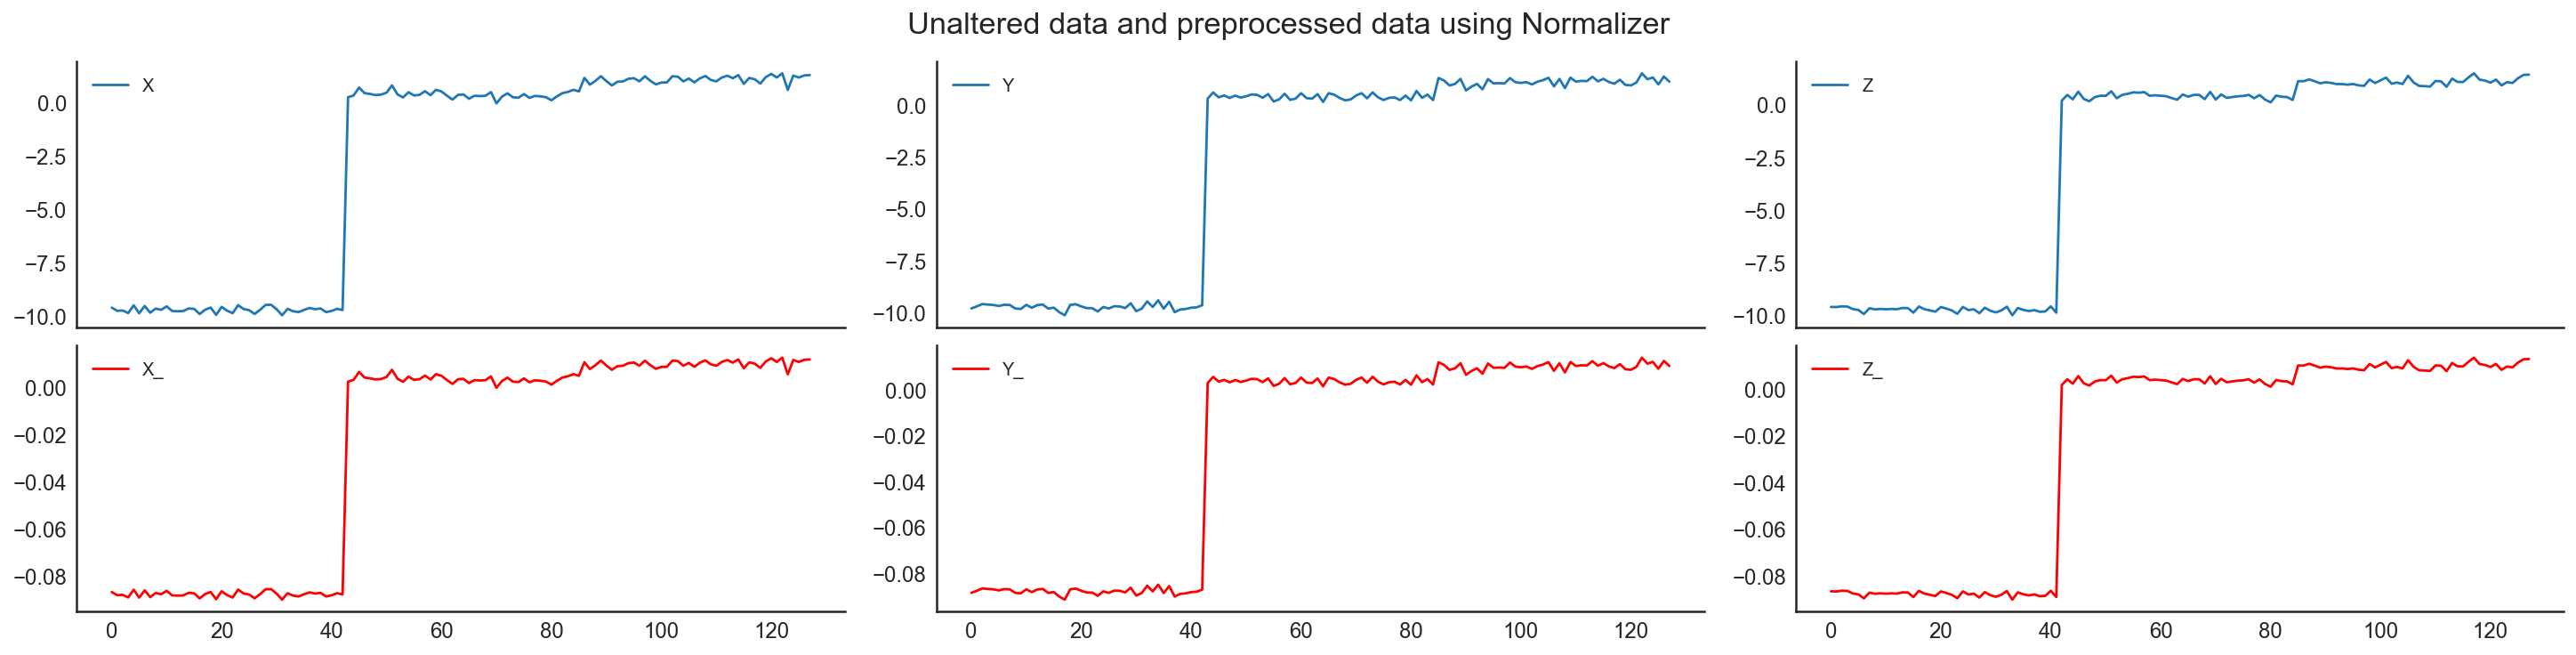

In [96]:
compare_preprocessing(mhealth_df.drop(['Class'], axis = 1).values, 'Normalizer')

In [19]:
'''
We need to decide whether should noralize the data or not. And if yes which normalization to use and why. A section of this in the 
report.
'''

def my_train_test_split(data_df, window_length, prepro = "minmax"):
    labels = data_df['Class'].values
    data_df = data_df.drop(['Class'], axis = 1).values
    
    if prepro == 'minmax':
        processor = MinMaxScaler((-1.0, 1.0))
    elif prepro == 'robust':
        processor = RobustScaler()
    elif prepro == 'standard':
        processor = StandardScaler()
    elif prepro == 'norm':
        processor = Normalizer()
        
    data_df = processor.fit_transform(data_df)
    
    x_train, x_test, y_train, y_test = train_test_split(data_df, labels, stratify = labels, random_state = 124, 
                                                        shuffle = True)
    
    x_train = x_train.reshape(-1, window_length, 3)
    x_test = x_test.reshape(-1, window_length, 3)
    
    return x_train, y_train, x_test, y_test

In [20]:
x_train, y_train, x_test, y_test = my_train_test_split(mhealth_df, n_window_len, "robust")


In [21]:
n_classes = max(y_train) + 1
n_channels = 3

In [23]:
y_train_hot = keras.utils.to_categorical(y_train)
y_test_hot = keras.utils.to_categorical(y_test)

In [69]:
def get_cnn_model(input_shape, output_classes):
    temp_model = keras.Sequential([
        keras.layers.Conv1D(filters = 16, kernel_size = (10), strides = 1, activation = tf.nn.relu, input_shape = input_shape, 
                            padding='same'),
        keras.layers.Conv1D(filters = 32, kernel_size = (5), strides = 1, activation = tf.nn.relu, padding = 'same'),
        keras.layers.Conv1D(filters = 64, kernel_size = (3), strides = 1, activation = tf.nn.relu, padding = 'same'),
        keras.layers.Conv1D(filters = 128, kernel_size = (1), strides = 1, activation = tf.nn.relu, padding = 'same'),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(units = output_classes, activation = tf.nn.softmax)
    ])
    
    temp_model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), 
                      metrics = ['accuracy'])
    
    print(temp_model.summary())
    return temp_model
    

In [70]:
get_cnn_model((n_window_len, n_channels), n_classes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_45 (Conv1D)           (None, 128, 16)           496       
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 128, 32)           2592      
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 128, 64)           6208      
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 128, 128)          8320      
_________________________________________________________________
global_average_pooling1d_6 ( (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 11)                1419      
Total params: 19,035
Trainable params: 19,035
Non-trainable params: 0
_________________________________________________________________
None


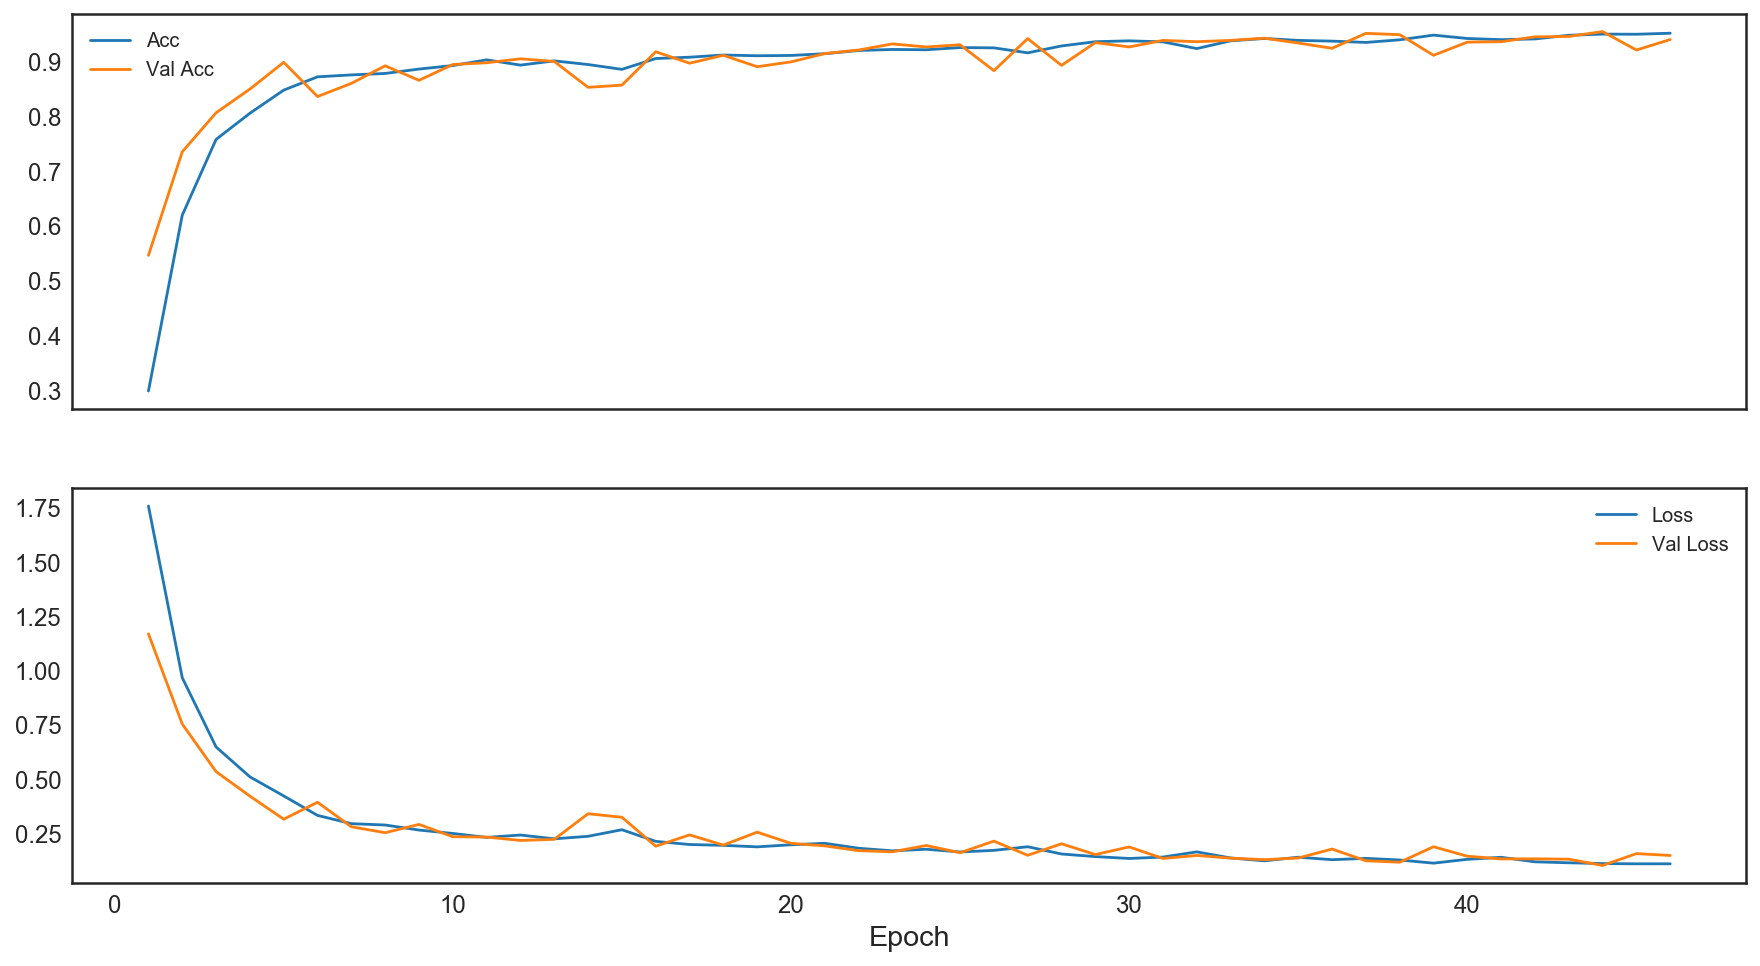

Epoch 00046: early stopping


In [71]:
d1_losses = util.PlotLosses()
d1_early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 30,
                                             min_delta = 0.1, verbose = 1, mode = 'min')
d1_callbacks = [d1_losses, d1_early_stop]
d1_model = get_cnn_model((n_window_len, n_channels), n_classes)

d1_history = d1_model.fit(x_train, y_train_hot, batch_size = 32, epochs = 300,
                           validation_data = (x_test, y_test_hot), verbose = 0, callbacks = d1_callbacks)

In [72]:
print(d1_model.evaluate(x_train, y_train_hot))
print(d1_model.evaluate(x_test, y_test_hot))

3743/3743 [==============================] - 1s 240us/step
[0.12789679438894902, 0.9388191288020118]
1248/1248 [==============================] - 0s 255us/step
[0.1480104589404968, 0.9399038461538461]


In [27]:
# Save the processed data for evaluation with adversarial modules
file = open('results/mhealth_processed_data_size_' + str(n_window_len) + '.pickle', 'wb')
pickle.dump([x_train, y_train, x_test, y_test, mhealth_activities], file)
file.close()

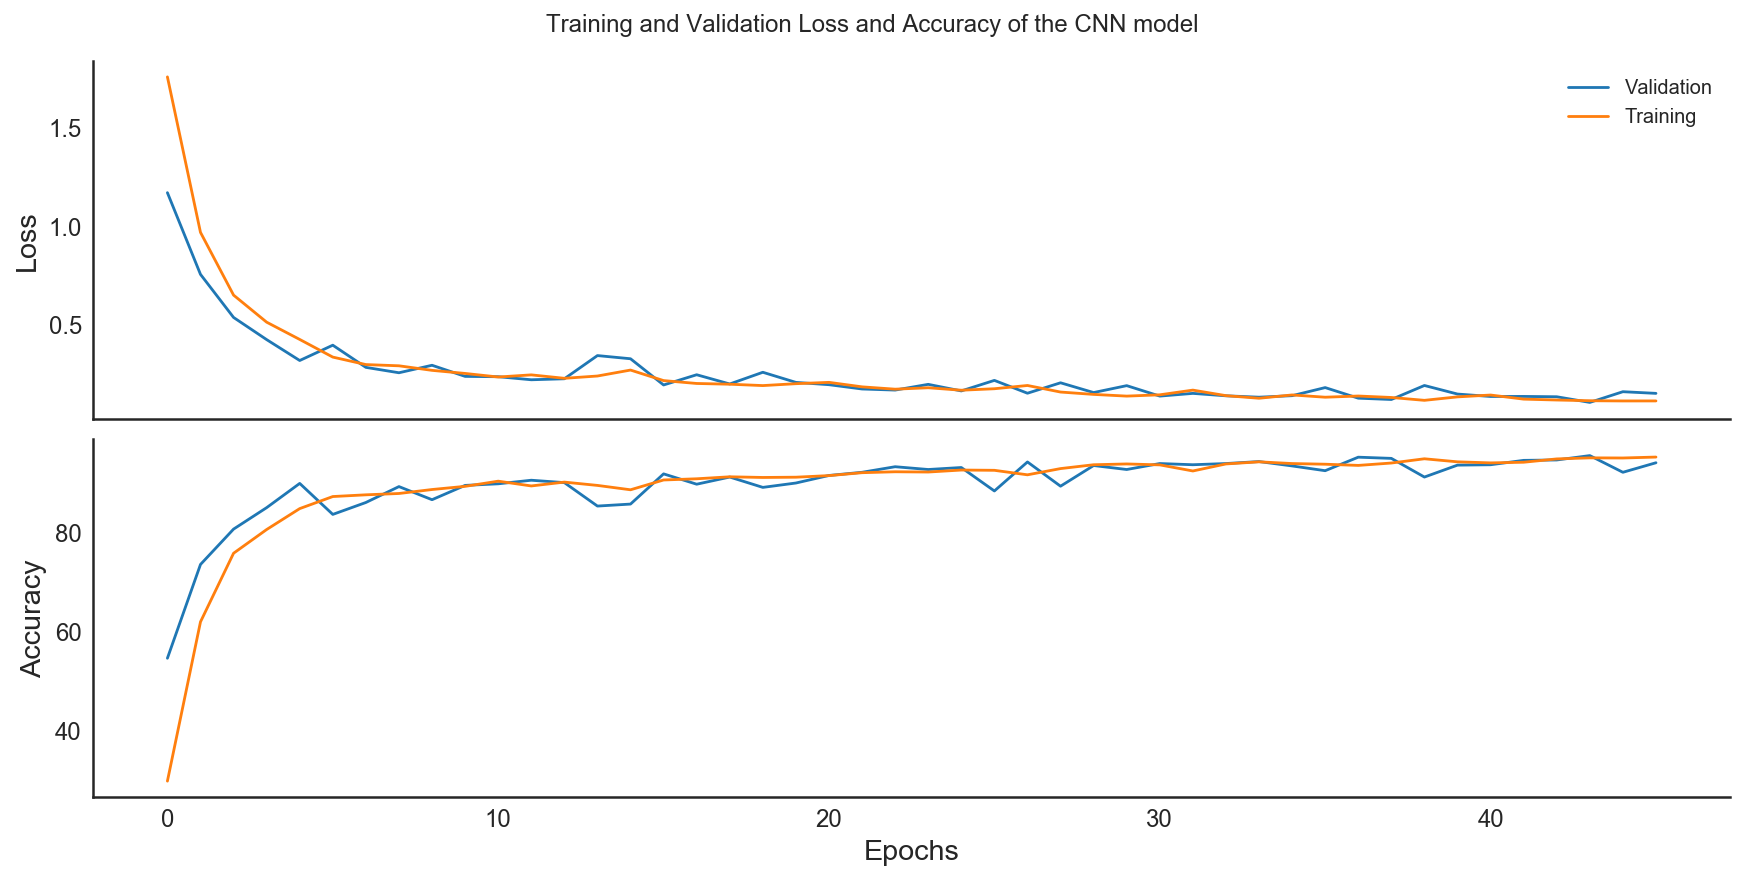

In [74]:
training_outcomes = d1_history.history

fig, axes = plt.subplots(nrows=2, ncols=1, constrained_layout=True, sharex = True, figsize = (12, 6))
axes[0].plot(training_outcomes['val_loss'], label='Validation')
axes[0].plot(training_outcomes['loss'], label='Training')
axes[0].set_ylabel('Loss')
axes[0].set_xticklabels("")
axes[0].legend()
stylize_axes(axes[0])

axes[1].plot([x * 100 for x in training_outcomes['val_acc']], label='Validation')
axes[1].plot([x * 100 for x in training_outcomes['acc']], label='Training')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel("Epochs")
axes[1].set_xticklabels(axes[1].get_xticks().astype(int))
stylize_axes(axes[1])

fig.suptitle("Training and Validation Loss and Accuracy of the CNN model")
save_image(fig, "Training and Validation Loss and Accuracy of the CNN model")

In [75]:
y_pred = np.argmax(d1_model.predict(x_test),  axis=1)

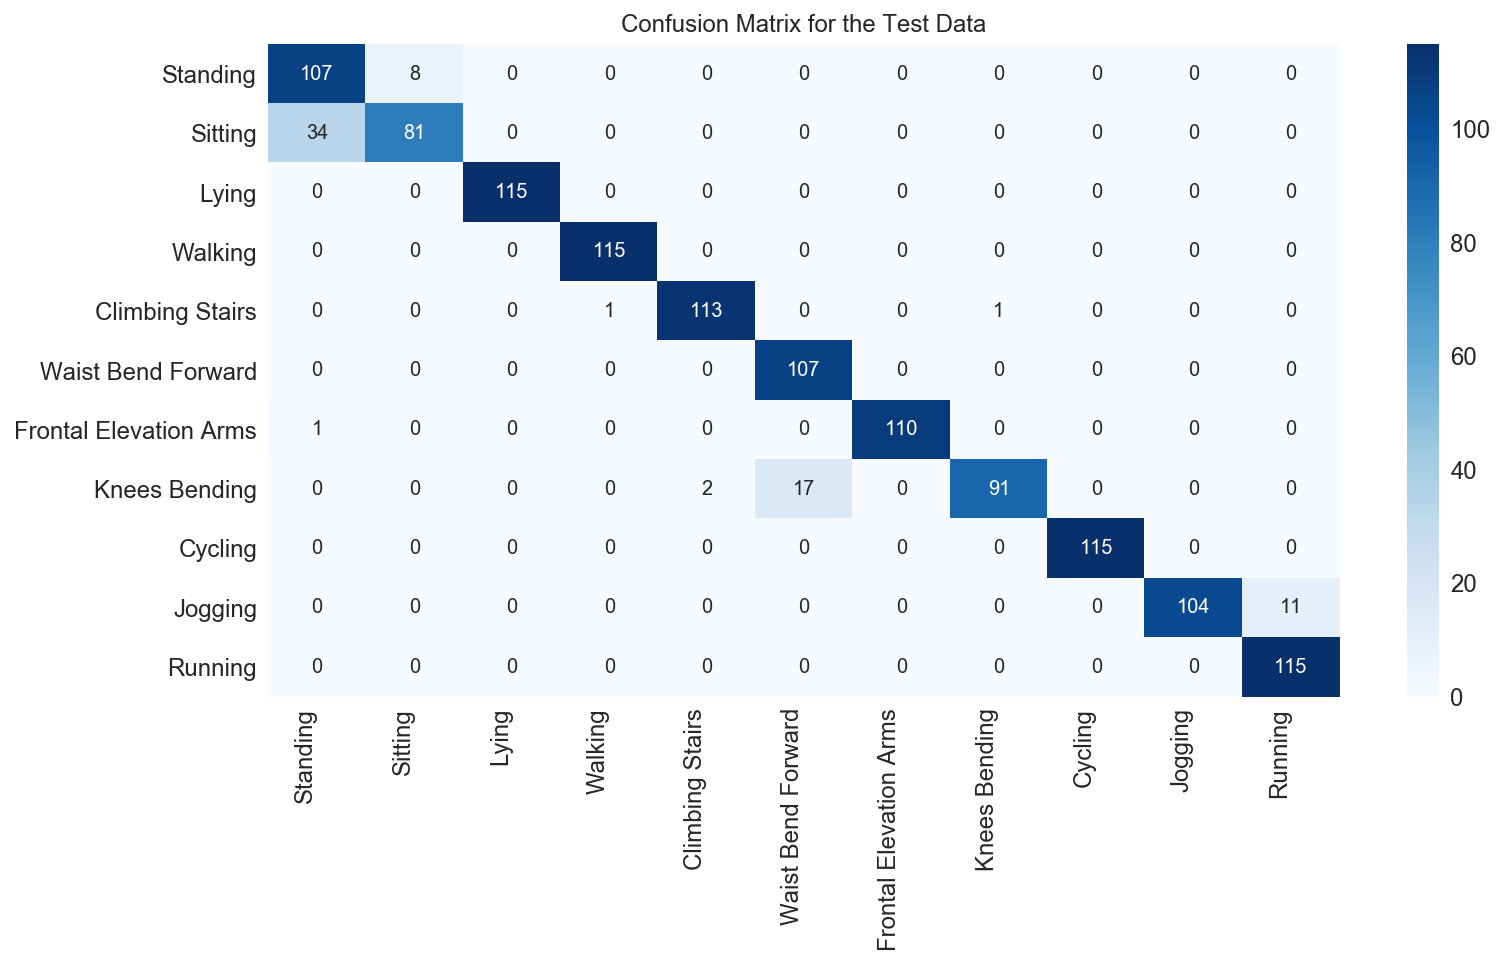

In [76]:
c_fig, c_ax = util.print_confusion_matrix(y_test, y_pred, np.arange(n_classes),
                           "Confusion Matrix for the Test Data", mhealth_activities)

In [77]:
stylize_axes(c_ax)
save_image(c_fig, "Confusion Matrix for the Test Data")

In [73]:
# Save the trained model to be used with adversarial module
d1_model.save("results/cnn_trained_model_mheatlh.h5")

In [161]:
# Load the saved model 
new_model = tf.keras.models.load_model('results/cnn_trained_model_mheatlh.h5')